In [10]:
import pandas as pd
import numpy as np
import copy
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
from datetime import datetime
from datetime import timedelta
import scipy as sc
import plotly.graph_objects as go
# import sqlite3
# from pypfopt.expected_returns import mean_historical_return
# from pypfopt.risk_models import CovarianceShrinkage
# from pypfopt.efficient_frontier import EfficientFrontier
# import pypfopt.plotting as plotting
import seaborn as sns



In [11]:
end_date = datetime.today()
start_date = end_date - timedelta(days=3000)
tickers = ["AAL","BABA","META","AAPL"]
weights = [20, 40, 20, 20]

In [12]:
# Import data
def getData(tickers:list, start_date:datetime, end_date:datetime):
    
    df = yf.download(tickers,
                    start=start_date,
                    end=end_date
                    )
    df = df['Adj Close']
    
    # mu = mean_historical_return(df)
    # S = CovarianceShrinkage(df).ledoit_wolf()
    # returns = df.pct_change()
    # meanReturns = returns.mean()
    # covMatrix = returns.cov()
    return df

tickers_df = getData(tickers, start_date, end_date)

# Calculate daily and annual returns of the stocks
returns_daily = tickers_df.pct_change()
returns_annual = returns_daily.mean() * 252

# Get daily and covariance of returns of the stocks
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 252

# Actual portfolio return, volatility and sharpe
def return_performance(weights, returns_annual):
    weights /= np.sum(weights)
    return_perf = np.dot(weights, returns_annual)
    return return_perf

def volatility_performance(weights, cov_annual):
    weights /= np.sum(weights)
    volatility_perf = np.sqrt(np.dot(np.array(weights).T, np.dot(cov_annual, weights)))
    return volatility_perf


actual_volatility = volatility_performance(weights, cov_annual)
actual_return = return_performance(weights, returns_annual)    
actual_sharpe = actual_return / actual_volatility
# Actual portfolio Return and Volatility
x_actual = [actual_volatility]
y_actual = [actual_return]

tickers_df.head()

[*********************100%***********************]  4 of 4 completed


AAPL        GIS        LLY       META         SPY        XOM
Date                                                                         
2015-01-02  24.565691  40.186165  58.668449  78.449997  176.788879  63.720261
2015-01-05  23.873640  39.459766  58.090633  77.190002  173.596176  61.976738
2015-01-06  23.875885  39.361404  58.383720  76.150002  171.960999  61.647278
2015-01-07  24.210684  40.193729  57.973389  76.150002  174.103851  62.271912
2015-01-08  25.140913  40.849514  59.346729  78.180000  177.193344  63.308407

In [13]:
from portfolio import random_portfolios
from portfolio import performance_random_portfolio

random_portfolios_df = random_portfolios(tickers, returns_annual, cov_annual)
sharpe_portfolio, min_variance_port, min_volatility_for_return, max_return_for_volatility = performance_random_portfolio(random_portfolios_df, actual_volatility, actual_return)




In [14]:


print(f'''Max Return for actual volatility : {max_return_for_volatility['Volatility'].values[0] :.4f}
        {max_return_for_volatility.iloc[:,-len(tickers):].to_dict('records')}
        ''')
print(f'''Min Volability for actual Return : {min_volatility_for_return['Returns'].values[0] :.4f}
        {min_volatility_for_return.iloc[:,-len(tickers):].to_dict('records')}
        ''')

Max Return for actual volatility : 0.2088
        {'SPY weight': {44374: 0.3030375580870037}, 'META weight': {44374: 0.12757605653729964}, 'AAPL weight': {44374: 0.3609641122877743}, 'LLY weight': {44374: 0.17181394883078902}, 'GIS weight': {44374: 0.016025831035908267}, 'XOM weight': {44374: 0.020582493221224987}}
        
Min Volability for actual Return : 0.1664
        {'SPY weight': {47390: 0.15144804414901986}, 'META weight': {47390: 0.33065639701708355}, 'AAPL weight': {47390: 0.24559699912710922}, 'LLY weight': {47390: 0.008917981687715354}, 'GIS weight': {47390: 0.13010479532972152}, 'XOM weight': {47390: 0.13327578268935067}}
        


c:\Python310\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


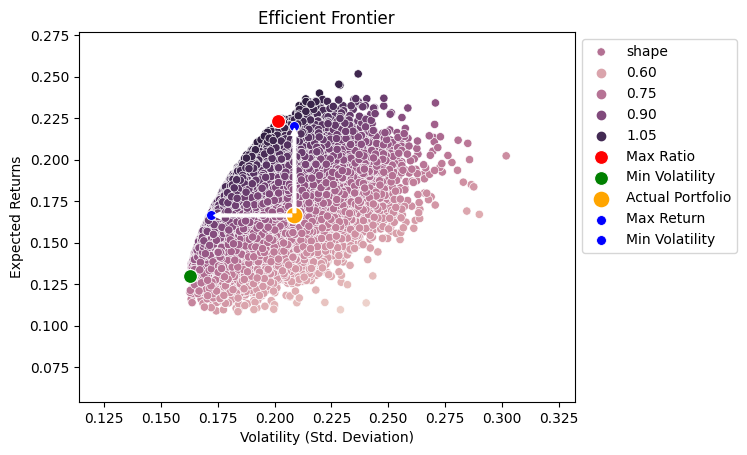

In [15]:
from graph import plot_efficient_frontier

plot_efficient_frontier(random_portfolios_df, sharpe_portfolio, min_variance_port, min_volatility_for_return, max_return_for_volatility, x_actual, y_actual)

In [16]:
# print the details of the 2 special portfolios
print(min_variance_port.T)
print(sharpe_portfolio.T)

                 56465
Returns       0.129838
Volatility    0.162649
Sharpe Ratio  0.798276
SPY weight    0.016535
META weight   0.329913
AAPL weight   0.108561
LLY weight    0.025108
GIS weight    0.479622
XOM weight    0.040261
                 38424
Returns       0.223347
Volatility    0.201531
Sharpe Ratio  1.108251
SPY weight    0.385808
META weight   0.191835
AAPL weight   0.377963
LLY weight    0.008683
GIS weight    0.012705
XOM weight    0.023006


In [17]:
df.tail()

NameError: name 'df' is not defined

NameError: name 'x_tg' is not defined

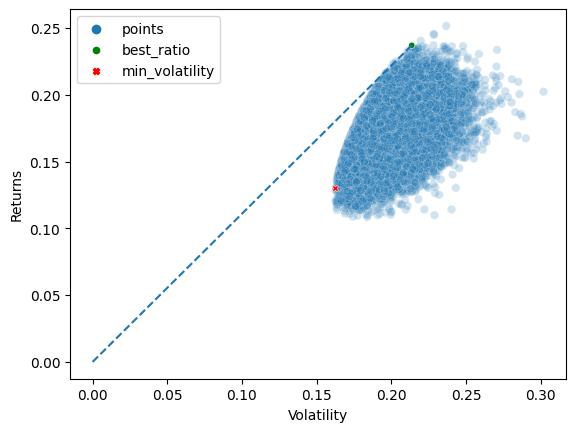

In [ ]:
df['tags'] = 'points'

# min_volatility = df[df['Volatility']==df['Volatility'].min()].iloc[:,-len(tickers):].to_dict()
min_vol_index = (df['Volatility']==df['Volatility'].min())
df.loc[min_vol_index,'tags'] = 'min_volatility'
df.loc[min_vol_index]

max_ratio_index = (df['Returns']/df['Volatility']).idxmax()
df.loc[max_ratio_index, 'tags'] = 'best_ratio'
df.loc[max_ratio_index]

tangent = df.loc[(df['Returns']/df['Volatility']).idxmax()]


x_tangent = [0,tangent['Volatility']]
y_tangent = [0,tangent['Returns']]
# plot the efficient frontier with a scatter plot

ax = sns.scatterplot(data=df[df.tags=='points'], x='Volatility', y='Returns', hue='tags', alpha=0.2)

sns.scatterplot(data=df[df.tags!='points'], x='Volatility', y='Returns' , hue='tags', alpha=1, palette=["green","red"], size='tags',size_order=['min_volatility','best_ratio' ], sizes=(20,20), style = 'tags')
sns.lineplot(x=x_tangent, y=y_tangent , linestyle='--')


# Set the axis limits
plt.xlim(0.15, max(x_tg) * 1.1)  # add some padding to the left and right
plt.ylim(0.10, max(y_tg) * 1.1)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()
